In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

print('Number of training observations:', len(train_data))
train_data.head()

Number of training observations: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print('Number of testing observations:', len(test_data))
test_data.head()

Number of testing observations: 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# check for empty values on training set
for col_headers in train_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, train_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Survived" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 177
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 687
Number of empty values on "Embarked" column: 2


In [87]:
# check for empty values on test set
for col_headers in test_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, test_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 86
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 1
Number of empty values on "Cabin" column: 327
Number of empty values on "Embarked" column: 0


In [81]:
# replace 'male' values to 0 and 'female' values to 1
train_data = train_data.replace({'male': 0, 'female': 1})
test_data = test_data.replace({'male': 0, 'female': 1})

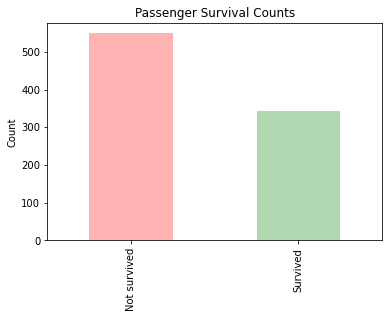

In [80]:
# visualize the number of survived passengers
LABEL = ['Not survived', 'Survived']
df_survived = train_data[['Survived']].value_counts()
df_survived.plot(kind='bar', color=['red', 'green'], alpha=.3)

plt.title('Passenger Survival Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), LABEL)
plt.show()

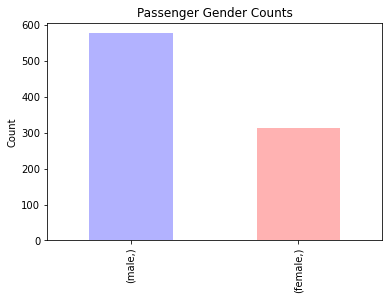

In [79]:
# visualize the count of passenger genders
df_sex = train_data[['Sex']].value_counts()
df_sex.plot(kind='bar', color=['blue', 'red'], alpha=.3)

plt.title('Passenger Gender Counts')
plt.xlabel('')
plt.ylabel('Count')

plt.show()

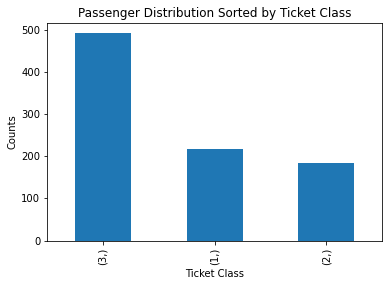

In [78]:
# visualize the count of ticket class
df_pclass = train_data[['Pclass']].value_counts()
df_pclass.plot(kind='bar')

plt.title('Passenger Distribution Sorted by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Counts')

plt.show()

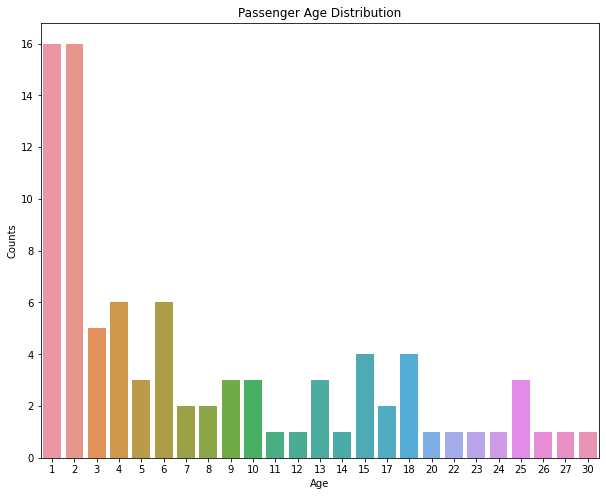

In [77]:
# visualize age distribution
df_age = train_data[['Age']].value_counts()
plt.figure(figsize=(10,8))
sns.countplot(df_age)

plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')

plt.show()

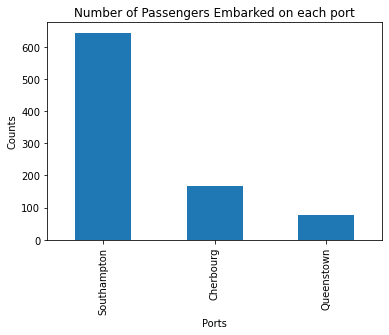

In [76]:
# visualize the number of passengers based on port of embarktion
PORTS = ['Southampton', 'Cherbourg', 'Queenstown']
df_port = train_data[['Embarked']].value_counts()
df_port.plot(kind='bar')

plt.title('Number of Passengers Embarked on each port')
plt.xlabel('Ports')
plt.ylabel('Counts')
plt.xticks(np.arange(3), PORTS)

plt.show()

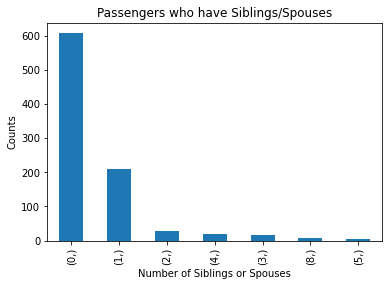

In [98]:
# visualize the number of passengers who have siblings or spouses
df_sibsp = train_data[['SibSp']].value_counts()
df_sibsp.plot(kind='bar')

plt.title('Passengers who have Siblings/Spouses')
plt.xlabel('Number of Siblings or Spouses')
plt.ylabel('Counts')

plt.show()

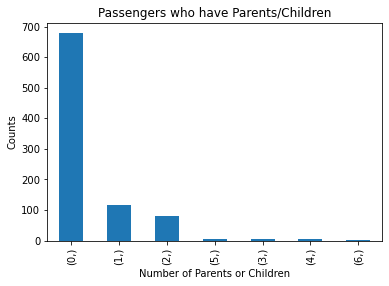

In [100]:
# visualize the number of passengers who have parents or children
df_parch = train_data[['Parch']].value_counts()
df_parch.plot(kind='bar')

plt.title('Passengers who have Parents/Children')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Counts')

plt.show()

In [129]:
# group the passengers who survived by gender
df_survived_gender = train_data[['Survived', 'Sex']].value_counts()
df_survived_gender = pd.pivot_table(df_survived_gender.to_frame(), values=0, index=['Survived', 'Sex'], aggfunc=np.sum)
df_survived_gender.rename(columns={0: 'Counts'})

Counts
Survived Sex        
0        0       468
         1        81
1        0       109
         1       233

<AxesSubplot:xlabel='Sex'>

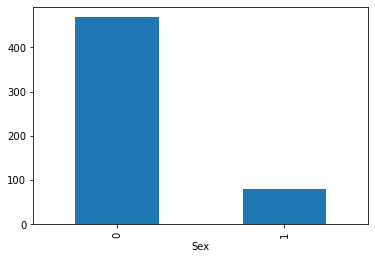

In [130]:
# number of passengers who didn't survive grouped by gender
df_survived_gender[0][0].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Sex'>

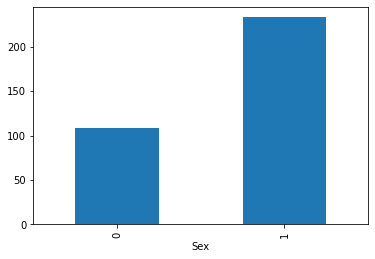

In [132]:
# number of passengers who survived grouped by gender
df_survived_gender[0][1].plot(kind='bar', stacked=True)

<AxesSubplot:>

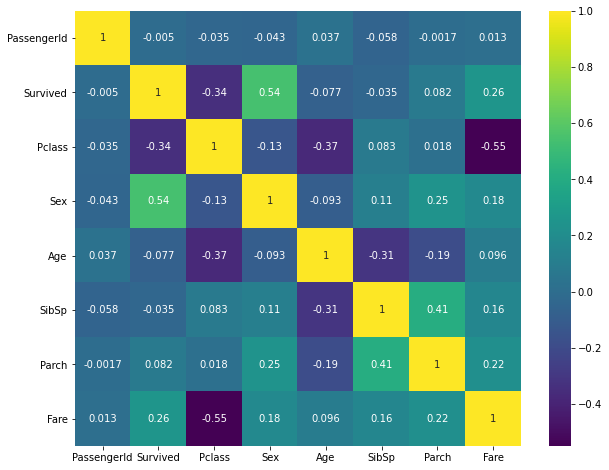

In [105]:
# pearson correlation against features and label
train_corr = train_data.corr()
plt.figure(figsize=(10,8))

sns.heatmap(train_corr, annot=True, cmap='viridis')

In [85]:
# build a prediction model
from sklearn.ensemble import RandomForestClassifier

y_train = train_data['Survived']
x_train = train_data[['Pclass', 'Sex', 'SibSp', 'Parch']]
x_test = test_data[['Pclass', 'Sex', 'SibSp', 'Parch']]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)
preds = model.predict(x_test)

In [86]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': preds})
output.to_csv('titanic_rf_submission.csv', index=False)
print("Submission saved!")

Submission saved!
